In [ ]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# import os
from google.colab import drive
import pickle 

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# test change

### generate test dataset and dataframe

In [ ]:
#  !!! Skip this if you have already generated the images  !!!

# create dataset ad dump it in pickle file 
tot_imgs = 100000
data_set_test = Create_N_Images(tot_imgs, only_one_number=False, n_squares=1, fixed_area=False, area_=2)   

# save flattened images
imgs = data_set_test.img_flatten
np.save('imgs.npy', imgs) 

# create and save dataframe
y = data_set_test.n_obj
hull = data_set_test.hull.flatten()
area_tot = data_set_test.total_areas.flatten()
imgs = data_set_test.img_flatten
index = range(tot_imgs)
data = {'num':y, 'area': area_tot, 'hull': hull, 'index': index} 
df = pd.DataFrame(data=data)
df.to_csv (r'data_test_100000.csv', index = None, header=True)

In [ ]:
# Retrieve data
df = pd.read_csv('data_test_100000.csv')
imgs = np.load('imgs.npy')
print (df.shape)
df.head()

FileNotFoundError: ignored

In [ ]:
# Selects n_hulls different hulls (in increasing size) and for each of those, n_areas different areas 
# (in increasing size)
def select_images_hulls_areas(num, df, n_hulls, n_areas):
    df2 = df[df.num == num]
    n_areas = n_areas
    n_hulls = n_hulls
    sel_hulls = []
    for k in df2.hull.unique():
        if len(df2[df.hull==k].area.unique())>n_areas:
            sel_hulls.append(k)
    #len(sel_areas)
    sel_hulls = np.sort(sel_hulls)
    dic = {}
    areas = []
    hulls = []
    indexes = []
    for (i, hull) in enumerate(sel_hulls[:n_hulls]):
        hulls.append(hull)
        #print (area)
        _ = df2[df2.hull == hull].sort_values('area')
        _.drop_duplicates(subset='area', keep='first', inplace=True)
        sel_areas = _.area.values[0:n_areas]
        ind_imgs = _.index.values[0:n_areas]
        areas.append(sel_areas)
        indexes.append(ind_imgs)
    dic = {'hulls': hulls, 'areas': areas, 'indexes': indexes}
    return dic

In [ ]:
# Selects n_areas different areas (in increasing size) and for each of those, n_hulls different hulls 
# (in increasing size)
def select_images_areas_hulls(num, df, n_areas, n_hulls):
    df2 = df[df.num == num]
    n_hulls = n_hulls
    n_areas = n_areas
    sel_areas = []
    for k in df2.area.unique():
        if len(df2[df.area==k].hull.unique())>n_hulls:
            sel_areas.append(k)
    #len(sel_areas)
    sel_areas = np.sort(sel_areas)
    dic = {}
    areas = []
    hulls = []
    indexes = []
    for (i, area) in enumerate(sel_areas[:n_areas]):
        areas.append(area)
        #print (area)
        _ = df2[df2.area == area].sort_values('hull')
        _.drop_duplicates(subset='hull', keep='first', inplace=True)
        sel_hulls = _.hull.values[0:n_hulls]
        ind_imgs = _.index.values[0:n_hulls]
        hulls.append(sel_hulls)
        #ind_imgs = df[df.area == area].sort_values('hull').index.values[0:n_hulls]
        indexes.append(ind_imgs)
        #print (len(sel_hulls))
        #print (len(ind_imgs))
    dic = {'areas': areas, 'hulls': hulls, 'indexes': indexes}
    return dic

In [ ]:
# example: numerosity = 3, areas considered = n_areas, hulls per area = n_hulls
num=5
n_areas=10
n_hulls=10
dic_a_h = select_images_areas_hulls(num, df, n_areas, n_hulls)
dic_a_h

/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: U

{'areas': [8, 11, 13, 14, 16, 17, 19, 20, 21, 22],
 'hulls': [array([ 86,  87, 100, 102, 122, 130, 138, 146, 147, 176]),
  array([ 83,  90,  98,  99, 100, 105, 115, 123, 135, 140]),
  array([102, 125, 132, 139, 140, 142, 145, 146, 147, 159]),
  array([ 67, 117, 128, 135, 138, 146, 147, 151, 165, 166]),
  array([ 71,  89,  93,  98, 110, 116, 124, 126, 135, 137]),
  array([ 94, 111, 119, 129, 140, 164, 166, 190, 191, 226]),
  array([ 90,  93,  96, 101, 104, 105, 107, 109, 111, 120]),
  array([107, 109, 110, 122, 138, 147, 160, 175, 178, 190]),
  array([103, 108, 111, 118, 122, 123, 128, 129, 130, 134]),
  array([ 94,  96, 105, 112, 118, 122, 124, 128, 129, 141])],
 'indexes': [array([97518, 25624, 47509, 96786, 59438, 54252, 44988, 75894, 61423,
         69664]),
  array([28139, 77261, 87201, 50543, 13587, 42545, 13392, 51422, 19387,
         38764]),
  array([68697,   133, 33159, 64082, 30174, 23452, 82707, 65580, 52562,
         28948]),
  array([ 8101, 24353, 62550, 49566, 60584, 2069

area: 22
hull: 94


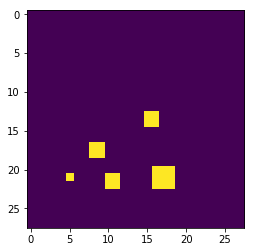

hull: 96


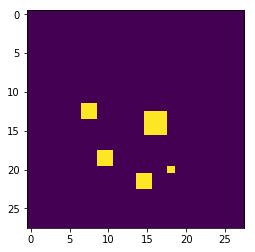

hull: 105


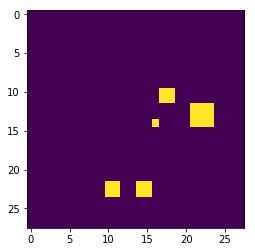

hull: 112


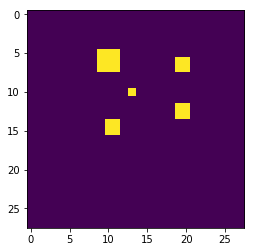

hull: 118


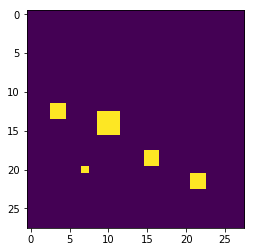

hull: 122


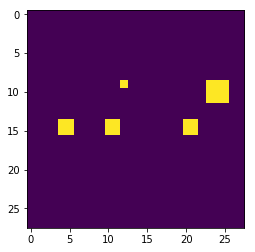

hull: 124


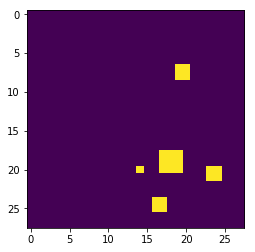

hull: 128


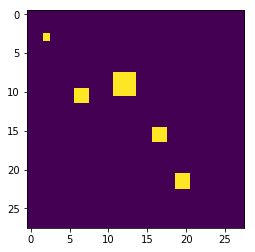

hull: 129


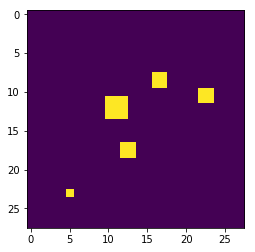

hull: 141


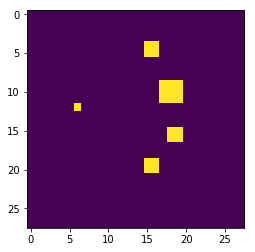

In [ ]:
# plot images: fixed area, all hulls
dic = dic_a_h
# select one area k=0,...,areas
from random import randrange
k = randrange(len(dic['areas']))
print("area: {}".format(dic['areas'][k]))
for (i, index) in enumerate(dic['indexes'][k]):
    print("hull: {}".format(dic['hulls'][k][i]))
    plt.imshow(imgs[index].reshape(28,28))
    plt.show()

In [ ]:
# example: numerosity = 3, n_hulls considered = n_hulls, n_areas per hull = n_areas
num=5
n_hulls=10
n_areas=10
dic_h_a = select_images_hulls_areas(num, df, n_hulls, n_areas)
dic_h_a

/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: U

/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/celestic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: U

{'hulls': [128, 129, 134, 135, 136, 138, 139, 143, 145, 146],
 'areas': [array([14, 19, 21, 22, 23, 26, 27, 29, 31, 35]),
  array([17, 19, 21, 22, 28, 34, 35, 37, 38, 39]),
  array([ 5, 21, 24, 29, 31, 32, 34, 37, 39, 43]),
  array([11, 14, 16, 19, 21, 23, 24, 26, 27, 30]),
  array([25, 26, 32, 34, 35, 39, 40, 42, 44, 53]),
  array([ 8, 14, 16, 20, 23, 24, 26, 27, 31, 32]),
  array([13, 23, 29, 31, 32, 35, 40, 43, 47, 48]),
  array([27, 28, 36, 38, 40, 44, 45, 46, 50, 53]),
  array([13, 19, 26, 27, 28, 29, 31, 32, 34, 41]),
  array([ 8, 13, 14, 19, 23, 29, 35, 36, 37, 38])],
 'indexes': [array([62550, 47739, 87887, 27059, 27701, 75124,  2950, 36483, 37813,
         29142]),
  array([38557, 78178, 69115, 38449, 30536, 58534, 74807,  8936, 68657,
         38624]),
  array([58586,  2860, 10393, 71800, 57828, 84373, 77541, 37185,    17,
         33683]),
  array([19387, 49566,  8961, 68895, 81647, 97372, 20822, 49746, 16932,
         28552]),
  array([ 2378, 46311, 23381,  5724, 61142, 607

hull: 146
area: 8


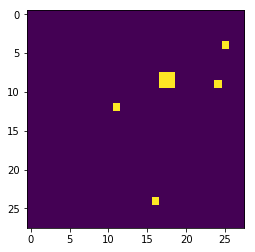

area: 13


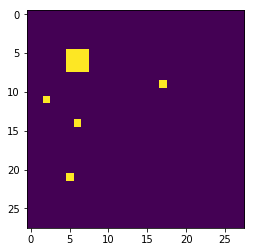

area: 14


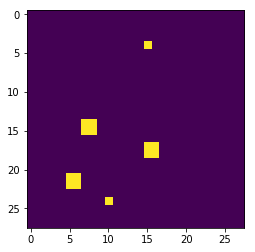

area: 19


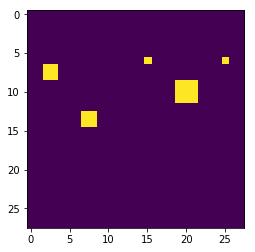

area: 23


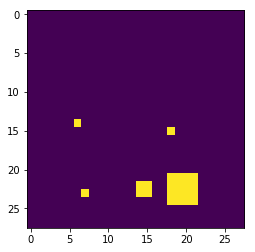

area: 29


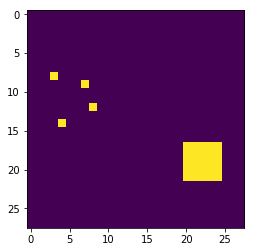

area: 35


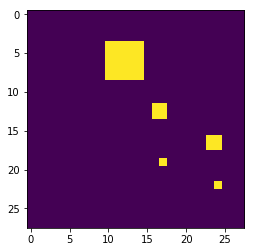

area: 36


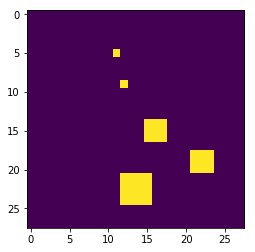

area: 37


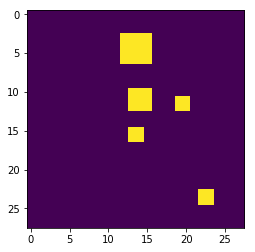

area: 38


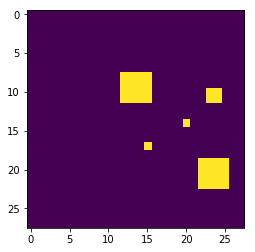

In [ ]:
# plot images: fixed hull, all areas
dic = dic_h_a
# select one hull k=0,...,hulls
from random import randrange
k = randrange(len(dic['hulls']))
print("hull: {}".format(dic['hulls'][k]))
for (i, index) in enumerate(dic['indexes'][k]):
    print("area: {}".format(dic['areas'][k][i]))
    plt.imshow(imgs[index].reshape(28,28))
    plt.show()

In [ ]:
# selected test images of fixed areas and varying hulls
import warnings
warnings.filterwarnings("ignore")
indexes_a_h = []
for num in range(2,11):
    dic = select_images_areas_hulls(num, df, 10, 10)
    indexes_a_h = np.append(indexes_a_h, [index for sublist in dic['indexes'] for index in sublist]).astype('int')
print (len(indexes_a_h))

900


In [ ]:
imgs_sel_a_h = imgs[indexes_a_h]
num_sel_a_h = df['num'].loc[indexes].values
area_sel_a_h =  df['area'].loc[indexes].values
hull_sel_a_h =  df['hull'].loc[indexes].values

index: 75933
numerosity: 2
area: 25
hull: 42


array([    2,    25,    42, 75933])

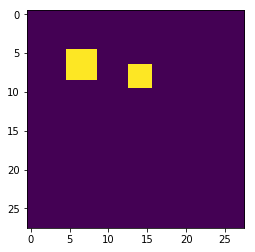

In [ ]:
# plot and check
k = random.randrange(0, 900, 1)
plt.imshow(imgs_sel[k].reshape(28,28))
print ("index: {}".format(indexes_a_h[k]))
print("numerosity: {}".format(num_sel_a_h[k]))
print("area: {}".format(area_sel_a_h[k]))
print("hull: {}".format(hull_sel_a_h[k]))
df.loc[indexes_a_h[k]].values # check

In [ ]:
# selected test images of fixed hulls and varying areas
import warnings
warnings.filterwarnings("ignore")
indexes_h_a = []
for num in range(2,11):
    dic = select_images_hulls_areas(num, df, 10, 10)
    indexes_h_a = np.append(indexes_h_a, [index for sublist in dic['indexes'] for index in sublist]).astype('int')
print (len(indexes_h_a))

900


In [ ]:
imgs_sel_h_a = imgs[indexes_h_a]
num_sel_h_a = df['num'].loc[indexes_h_a].values
area_sel_h_a =  df['area'].loc[indexes_h_a].values
hull_sel_h_a =  df['hull'].loc[indexes_h_a].values

index: 92298
numerosity: 4
area: 22
hull: 92


array([    4,    22,    92, 92298])

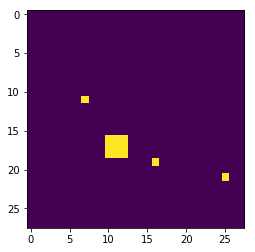

In [ ]:
k = random.randrange(0, 900, 1)
plt.imshow(imgs_sel[k].reshape(28,28))
print ("index: {}".format(indexes_h_a[k]))
print("numerosity: {}".format(num_sel_h_a[k]))
print("area: {}".format(area_sel_h_a[k]))
print("hull: {}".format(hull_sel_h_a[k]))
df.loc[indexes_h_a[k]].values # check

### Pairwise relationships among numerosity, total_area and convex_hull

In [ ]:
df_sel = df.loc[indexes_a_h]
df_sel.shape

(900, 4)

In [ ]:
# Load data sets

# Load big data set: 100.000 images used to do the analysis in the paper
df_big = pd.read_csv('/content/drive/My Drive/Number_Estimation/numerosity-estimation-master-data/data/test_neural/data_100000.csv')
#df_imgs_big = np.load('/content/drive/My Drive/Number_Estimation/numerosity-estimation-master-data/data/test_neural/imgs_100000.npy')

# Load training set:
df_train = pd.read_csv("/content/drive/My Drive/Number_Estimation/numerosity-estimation-master-data/data/train_test/data_train_test.csv")




In [ ]:
# Load area, hull controlled data set
df_data_h_a = pd.read_csv('/content/drive/My Drive/Number_Estimation/numerosity-estimation-master-data/data/test_neural/data_h_a.csv')
df_data_a_h = pd.read_csv('/content/drive/My Drive/Number_Estimation/numerosity-estimation-master-data/data/test_neural/data_a_h.csv')

In [ ]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.03, .9), xycoords=ax.transAxes)
                #xy=(.1, .9), xycoords=ax.transAxes)

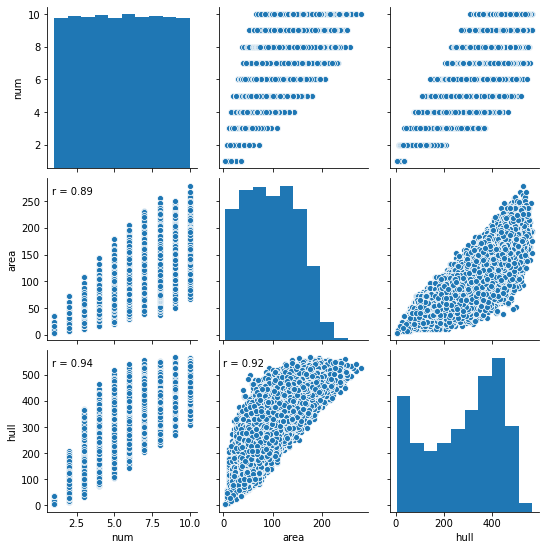

In [ ]:
# statistics for big data set
g = sns.pairplot(df_big[['num','area','hull']]);
g.map_lower(corrfunc)
path_img = '/content/drive/My Drive/Number_Estimation/Tensorflow_NumEst/plots/df_big_dataset_statistics.png'
g.savefig(path_img)

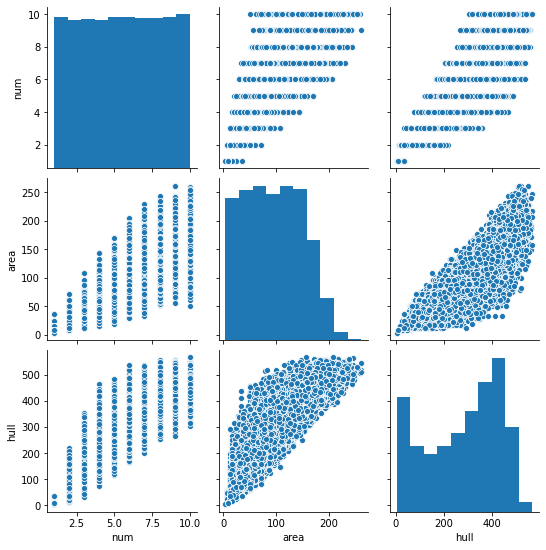

In [ ]:
# statistics for big data set
sns.pairplot(df_train[['num','area','hull']]);

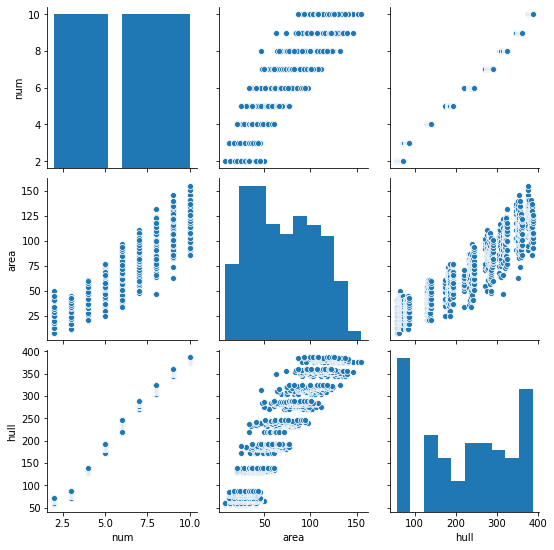

In [ ]:
# statistics for big data set
sns.pairplot(df_data_h_a[['num','area','hull']]);

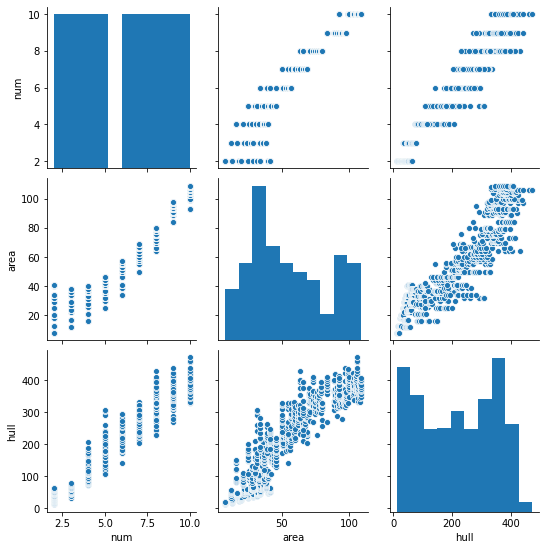

In [ ]:
# statistics for big data set
sns.pairplot(df_data_a_h[['num','area','hull']]);

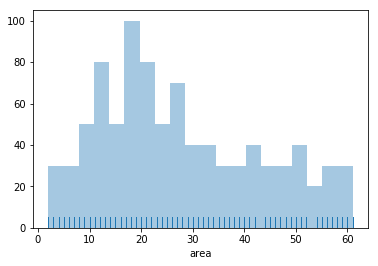

In [ ]:
sns.distplot(df_sel['area'], bins=20, kde=False, rug=True)

### total_area per numerosity

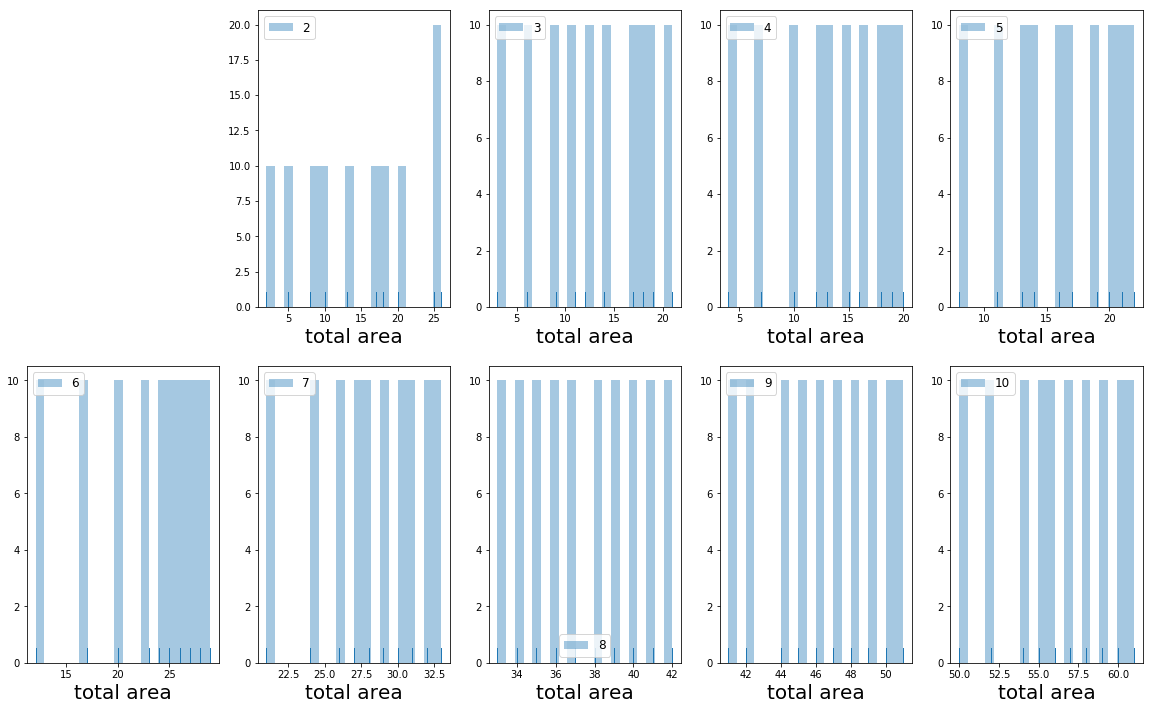

In [ ]:
fig = plt.figure(figsize=(20, 12))
for i in range(2,11,1):
    plt.subplot(2, 5, i)
    b = sns.distplot(df_sel[df_sel.num==i].area, kde=False, bins=20, label=str(i), rug=True)
    plt.legend(prop={'size': 12})
    b.set_xlabel("total area",fontsize=20)
    #df[df.label==i].area.hist()
plt.show()

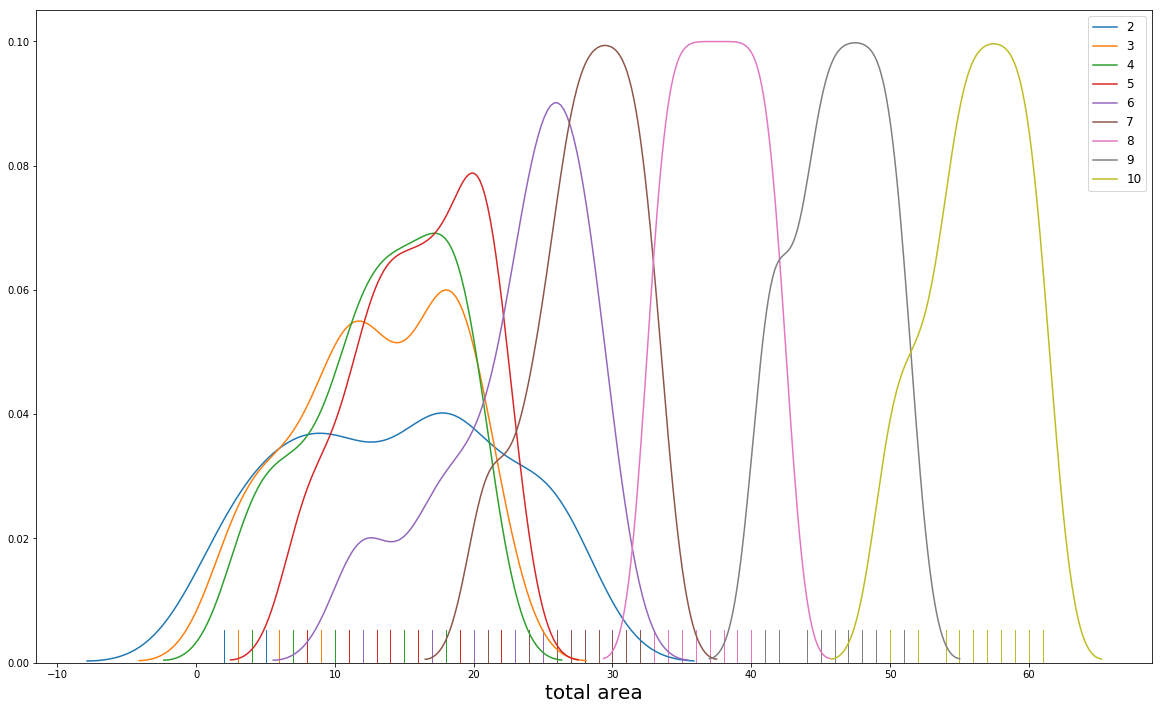

In [ ]:
fig = plt.figure(figsize=(20, 12))
for k in range(2,11,1):
    b = sns.distplot(df_sel[df_sel.num==k]['area'], label=str(k), hist = False, kde = True, rug=True)  
    plt.legend(prop={'size': 12})
    b.set_xlabel("total area",fontsize=20)

### convex hull per numerosity

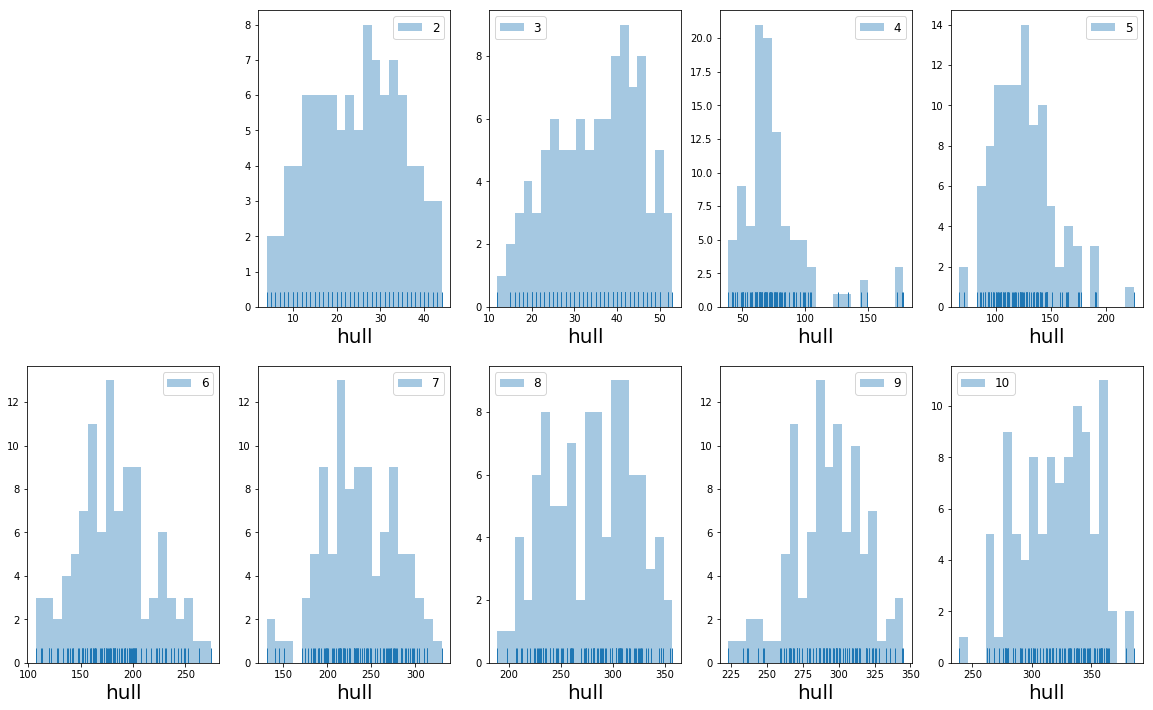

In [ ]:
fig = plt.figure(figsize=(20, 12))
for i in range(2,11,1):
    plt.subplot(2, 5, i)
    b = sns.distplot(df_sel[df_sel.num==i].hull, kde=False, bins=20, label=str(i), rug=True)
    plt.legend(prop={'size': 12})
    b.set_xlabel("hull",fontsize=20)
    #df[df.label==i].area.hist()
plt.show()

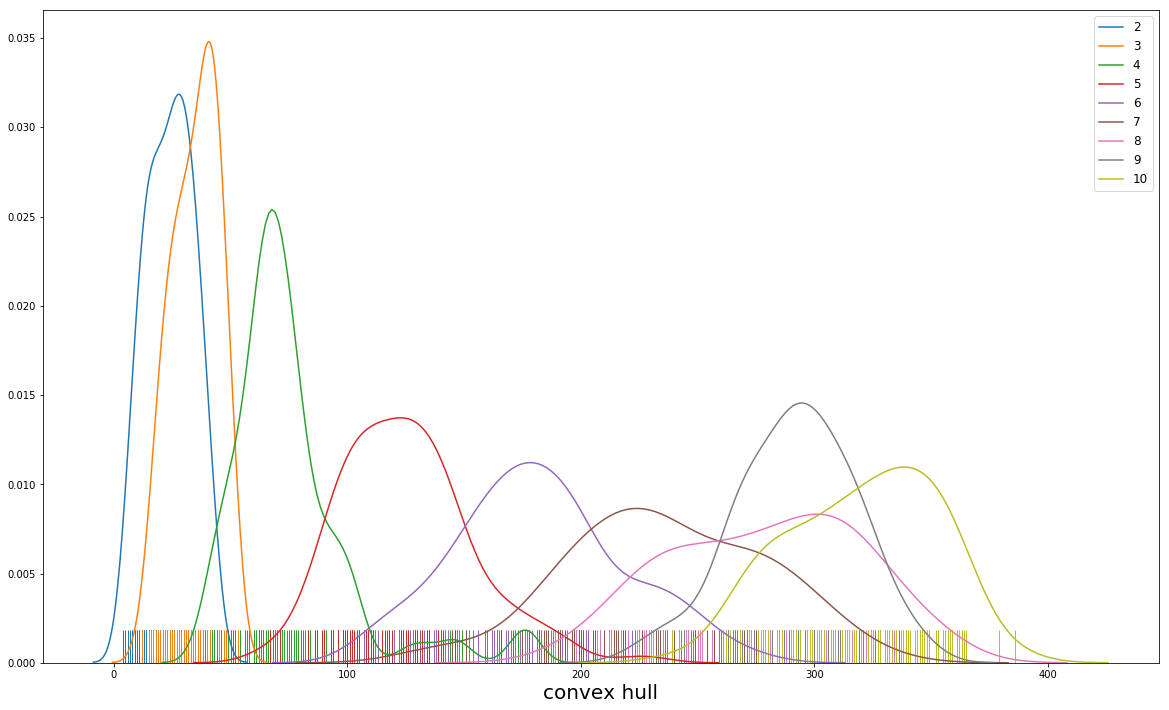

In [ ]:
fig = plt.figure(figsize=(20, 12))
for k in range(2,11,1):
    b = sns.distplot(df_sel[df_sel.num==k]['hull'], label=str(k), hist = False, kde = True, rug=True)  
    plt.legend(prop={'size': 12})
    b.set_xlabel("convex hull",fontsize=20)